# Online Retail - EDA & Customer Segmentation(K-means Clustering)

#### In this project, I have conducted an in-depth analysis of the thriving online retail sector by examining a transactional dataset from a UK-based retailer. This dataset contains records of all transactions that took place between 2010 and 2011. 
#### My primary goal is to enhance the effectiveness of marketing strategies and increase sales through customer segmentation. 
#### This approach involves transforming the transactional data into a customer-focused dataset by generating new features that will simplify the process of segmenting customers into distinct groups using the K-means clustering algorithm. 
#### This segmentation will provide us with valuable insights into the unique characteristics and preferences of various customer groups.


## Dataset and Attributes

This dataset comprises 8 variables with the following meanings:

InvoiceNo: This is the invoice number, which is a 6-digit integral code uniquely identifying each transaction. 

StockCode: This represents the product or item code, consisting of 5 digits and serving as a unique identifier for each distinct product.

Description: This field contains the product or item name, providing a nominal description of the item.

Quantity: This numeric variable indicates the quantity of each product or item involved in a given transaction.

InvoiceDate: Invoice Date and time are represented in numeric format, denoting both the date and time when each transaction was generated.

UnitPrice: This numeric field represents the unit price of the product, indicating the price per unit in sterling currency.

CustomerID: Customer number is a nominal 5-digit integral code that uniquely identifies each customer.

Country: This nominal variable represents the name of the country where each customer resides.








Importing required Libraries for analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_excel("Online Retail.xlsx")

In [3]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
print(retail.shape)

(541909, 8)


The above Dataset contains 541909 rows and 8 Columns

In [5]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
361533,568346,82483,WOOD 2 DRAWER CABINET WHITE FINISH,1,2011-09-26 15:28:00,14.13,14096.0,United Kingdom
304058,563558,21205,MULTICOLOUR 3D BALLS GARLAND,6,2011-08-17 13:40:00,2.55,14156.0,EIRE
97355,544601,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-02-22 09:00:00,3.25,16638.0,United Kingdom
504853,578995,23399,HOME SWEET HOME HANGING HEART,6,2011-11-27 15:59:00,0.85,15861.0,United Kingdom
383604,570036,22560,TRADITIONAL MODELLING CLAY,24,2011-10-07 10:50:00,1.25,16358.0,United Kingdom
37393,539463,16015,MEDIUM CHINESE STYLE SCISSOR,20,2010-12-19 11:19:00,0.50,18077.0,United Kingdom
450914,575177,22806,SET OF 6 T-LIGHTS WEDDING CAKE,1,2011-11-08 18:41:00,5.79,NaN,United Kingdom
337848,566482,21158,MOODY GIRL DOOR HANGER,24,2011-09-13 09:43:00,0.39,16609.0,United Kingdom
157597,550208,22518,CHILDS GARDEN BRUSH BLUE,1,2011-04-15 10:39:00,4.13,NaN,United Kingdom
87578,543660,20707,CRAZY DAISY HEART DECORATION,3,2011-02-11 10:40:00,0.83,NaN,United Kingdom


In [8]:
# describing the data

retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**We can observe from above that Quantity and Unit Price having minimum value to be negative which is not possible**


In [9]:
# taking out information about the data

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# checking the data-types of the data

retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

**Customer ID is observed to be having data type Float64 for we can convert it into int**

In [11]:
retail.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**Checking unique values let's us know that there are total 38 different countires where transactions is occured.**

### Checking if there is any NULL values present in the data

In [12]:
retail.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

**There are some Null valus present in Desctiption and Customer ID , lets have indepth analysis in that.**

In [13]:
retail.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

**There are total 135080 Null values in Customer ID and 1454 Null Values in Description.**

In [14]:
#looking into data with missing values
retail[retail.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


### Filling and Droping Missing Values

In [15]:
retail["Description"].fillna("None").sample(20)

55187     FOLDING UMBRELLA WHITE/RED POLKADOT
256236       CHILDRENS CUTLERY RETROSPOT RED 
10386         SET 12 KIDS  WHITE CHALK STICKS
378172       PINK BLUE FELT CRAFT TRINKET BOX
342690                LUNCH BAG  BLACK SKULL.
210839              WHITE STITCHED WALL CLOCK
88179           CHOCOLATE THIS WAY METAL SIGN
137008      ROUND SNACK BOXES SET OF 4 SKULLS
380698    PAINTED METAL STAR WITH HOLLY BELLS
78954                          DOTCOM POSTAGE
485494           DANISH ROSE DECORATIVE PLATE
509318     SET 6 SCHOOL MILK BOTTLES IN CRATE
330866                    BATHROOM METAL SIGN
89125      SET 20 NAPKINS FAIRY CAKES DESIGN 
256245    ROUND SNACK BOXES SET OF4 WOODLAND 
6055            ENGLISH ROSE HOT WATER BOTTLE
380429                   FEATHER PEN,HOT PINK
266457                    MOTORING TISSUE BOX
168432           MEMO BOARD RETROSPOT  DESIGN
206005                          PARTY BUNTING
Name: Description, dtype: object

In [16]:
retail["Description"].str.lower().str.contains("None").value_counts()

Description
False    540454
Name: count, dtype: int64

In [17]:
retail.dropna(subset=["CustomerID"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
retail.dropna(subset=["CustomerID"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [19]:
retail=retail.dropna(subset=["CustomerID"])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
retail.isna().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
retail[retail.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Converting Columns to integer

In [22]:
retail["CustomerID"]

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 406829, dtype: float64

In [23]:
retail["CustomerID"] = retail["CustomerID"].astype(int) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9748\2626633728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail["CustomerID"] = retail["CustomerID"].astype(int)


In [24]:
retail["CustomerID"]

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 406829, dtype: int32

**I have also converted "CustomerID" data type from Float64 to Integer.** 

In [25]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


**Now after removing 135080 rows containung "CustomerID" to be null we are left with 406829 rows and 8 columns,  and this is how I am finished with cleaning my Dataset.**

In [26]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


### Checking data quality issues

In [27]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [28]:
retail[retail["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


**Quantity ordered cannot be negative value, therefore we remove that data**

In [29]:
retail=retail[retail["Quantity"]>0]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [30]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


**So we have checked since unit price cannot also be 0 or negative so we check and remove that data also**

In [31]:
retail[retail["UnitPrice"]==0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [32]:
retail=retail[retail["UnitPrice"]>0.00]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [33]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [34]:
retail[retail["UnitPrice"] == 0.00 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Here We can see min value Both quantity and UnitPrice are in Possitive.**

### Preparing Data

In [35]:
retail["Revenue"]=retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**We add another column "Revenue" which will give us detail Earnings and other financial information in our further analysis.** 

In [36]:
retail["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [37]:
retail["Country"].nunique()

37

**There are total 37 countries where there is presence of online retail chain.**

In [38]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [39]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


### Exploratory Data Analysis

**Questions that can be answered from this dataset:**

- Total Number of Units sold  
- Total Number of Units/Quantity Sold by each country
- Amount of Money spent in each country
- Top 5 customers by order value
- Top 5 customers by most number of quantites ordered
- Top selling products in each country


### Total Number of Units Sold

In [40]:
retail['Quantity'].sum()

5167812

**Total number of quantity sold are 51 million units**

### Total number of orders by each country

In [41]:
orders_by_country = retail["Country"].value_counts()

In [42]:
orders_by_country

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


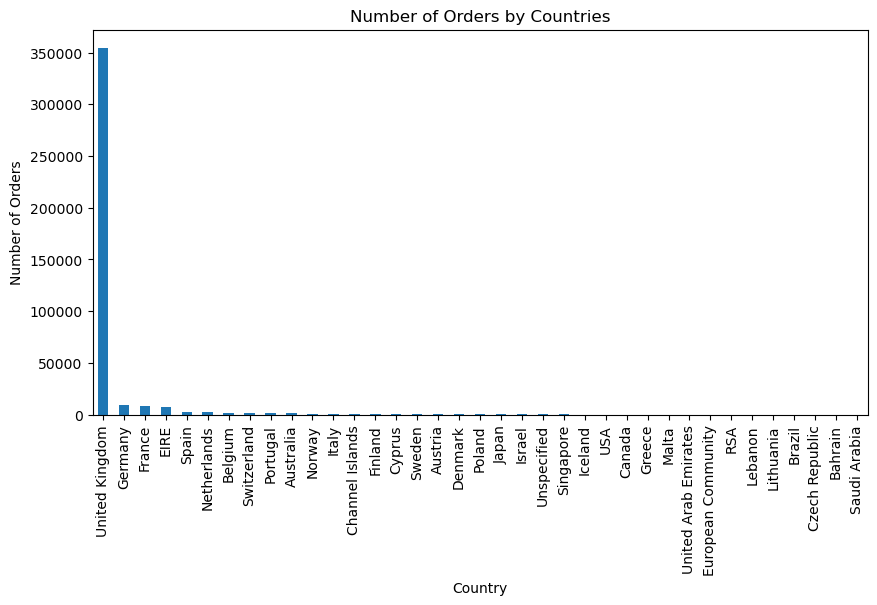

In [43]:
plt.subplots(figsize=(10,5))
orders_by_country.plot(kind='bar')
plt.xlabel('Country',fontsize=10)
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Countries')
plt.show()

In [44]:
orders_by_country.head(10)

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64

#### Let us find out top 10 countries by orders, as also to get better graph visualization

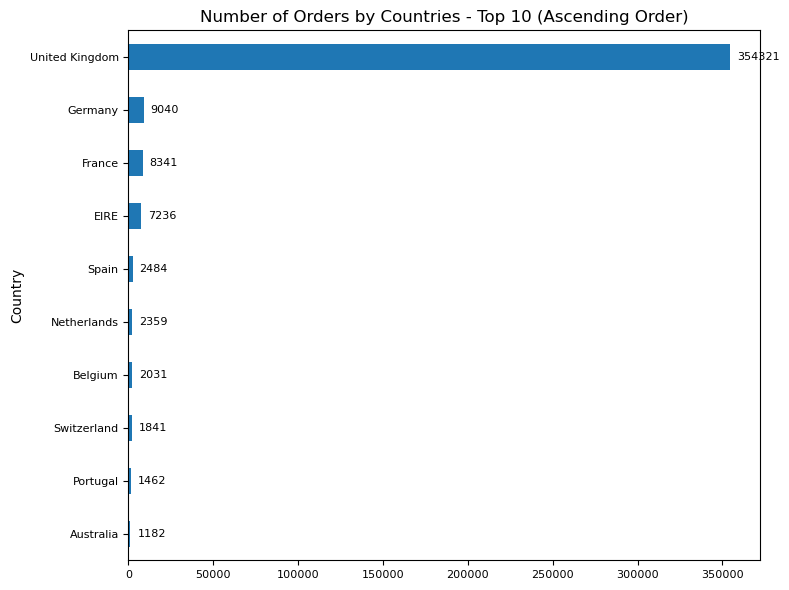

In [45]:
plt.figure(figsize=(8, 6))
plt.yticks(rotation=0, fontsize=8)  # Rotate y-axis labels to horizontal
plt.xlabel('Number of Orders', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.title('Number of Orders by Countries - Top 10 (Ascending Order)', fontsize=12)

# Plot the data as a horizontal bar graph in reverse order
ax = orders_by_country.head(10)[::-1].plot(kind='barh', fontsize=8)

# Add data labels on the right side of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                textcoords='offset points')

# Save the figure with a smaller DPI (dots per inch) to reduce file size
plt.savefig("01.Number_of_orders_by_country_Top10_horizontal_ascending.png", dpi=150)
plt.tight_layout()
plt.show()

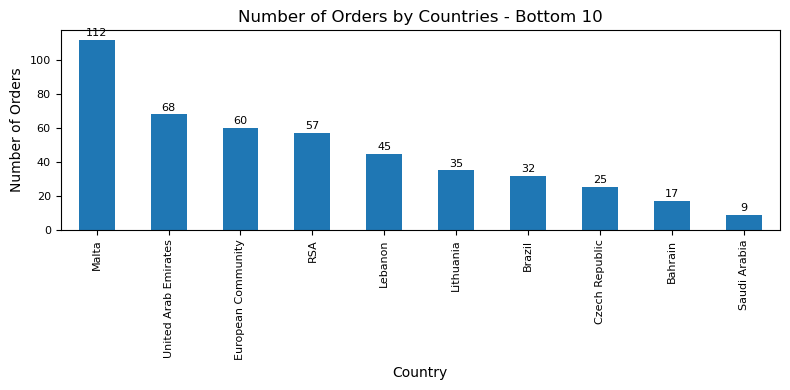

In [46]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Number of Orders', fontsize=10)
plt.title('Number of Orders by Countries - Bottom 10', fontsize=12)

ax = orders_by_country.tail(10).plot(kind='bar', fontsize=8)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig("01.Number_of_orders_by_country_bottom10.png", dpi=150)

plt.tight_layout()
plt.show()

#### For bottom 10 countries we have above visualization

In [47]:
retail.groupby("Country")["Quantity"].sum().sort_values(ascending=False)

Country
United Kingdom          4256740
Netherlands              200361
EIRE                     140275
Germany                  119261
France                   111471
Australia                 83901
Sweden                    36083
Switzerland               30082
Spain                     27940
Japan                     26016
Belgium                   23237
Norway                    19336
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


### Total Number of Units Sold by each country

In [48]:
qty_sum = retail.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(5)

In [49]:
qty_sum

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Name: Quantity, dtype: int64

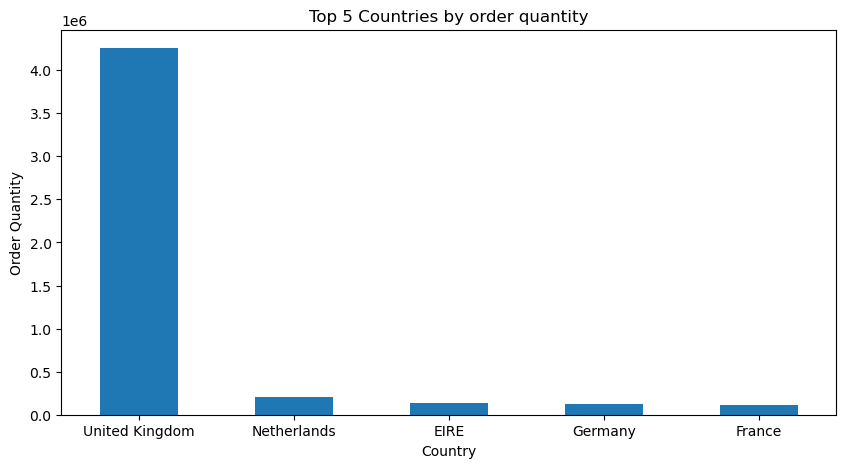

In [50]:
plt.subplots(figsize=(10,5))
qty_sum.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Order Quantity")
plt.title("Top 5 Countries by order quantity")
plt.xticks(rotation=0)
plt.savefig("Top 5 Countries by order quantity.png")
plt.show()

**From Above visualization it can be concluded that france and germany might not be having more quantity buying but their orders are more. As it becomes interesting we can also check for revenue generated from these top countries.**

### Top 5 Countries by Revenue

In [51]:
top_countries_revenues = retail.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head()

In [52]:
top_countries_revenues

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: Revenue, dtype: float64

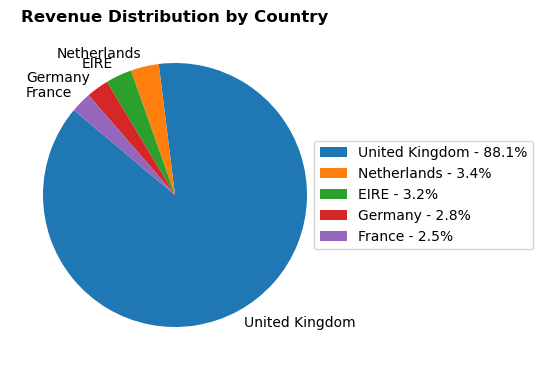

In [53]:
plt.figure(figsize=(6, 6))
plt.pie(top_countries_revenues, labels=top_countries_revenues.index, autopct='', startangle=140)
plt.title("Revenue Distribution by Country", weight='bold')
plt.gca().set_aspect('equal')  
plt.subplots_adjust(left=0.1, right=0.65)  
total_revenue = top_countries_revenues.sum()
percentages = (top_countries_revenues / total_revenue) * 100
plt.legend(labels=['{} - {:.1f}%'.format(label, percentage) for label, percentage in zip(top_countries_revenues.index, percentages)], 
           loc="center left", bbox_to_anchor=(0.9, 0.5))
plt.savefig("Revenue Distribution by Country.png")
plt.show()

#### Top 5 customers by amount spent

In [54]:
retail.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head()

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
Name: Revenue, dtype: float64

### Identifying top 10 high value customers

In [55]:
top_customers_revenues = retail.groupby("CustomerID")["Revenue"].sum().reset_index().sort_values(by="Revenue",ascending=False).head(10)

In [56]:
top_customers_revenues

,CustomerID,Revenue
1689,14646,280206.02
4201,18102,259657.30
3728,17450,194550.79
3008,16446,168472.50
1879,14911,143825.06
55,12415,124914.53
1333,14156,117379.63
3771,17511,91062.38
2702,16029,81024.84
0,12346,77183.60


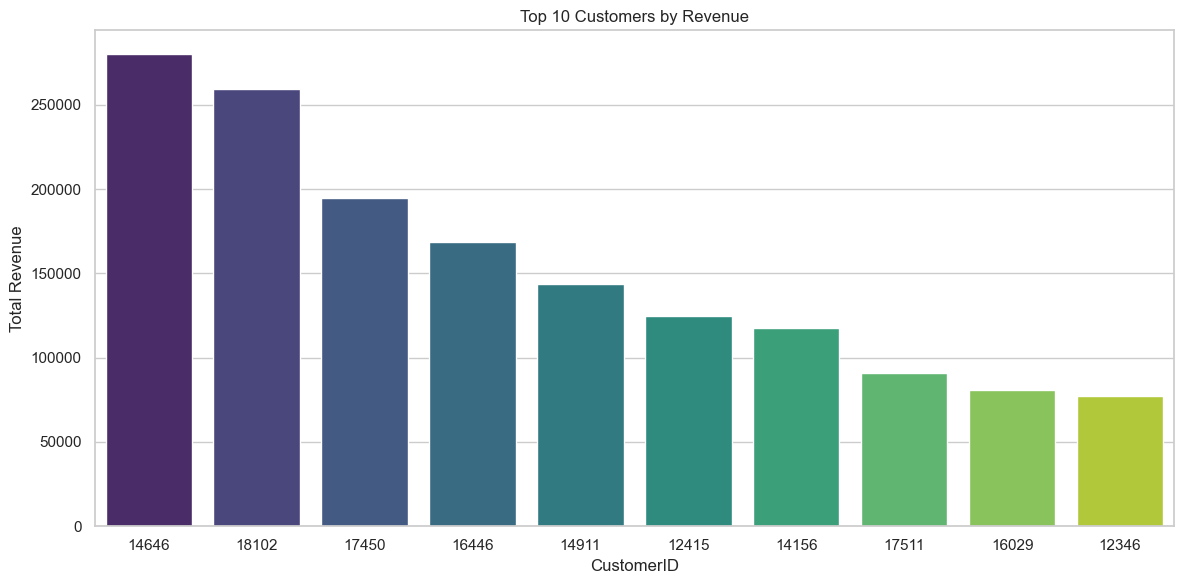

In [57]:
plt.figure(figsize=(12, 6))  
sns.set(style="whitegrid")
sns.barplot(x="CustomerID", y="Revenue", data=top_customers_revenues, palette="viridis", order=top_customers_revenues["CustomerID"])
plt.xlabel("CustomerID")
plt.ylabel("Total Revenue")
plt.title("Top 10 Customers by Revenue")
plt.tight_layout()  
plt.savefig("Top 10 Customers by Revenue")
plt.show()

In [58]:
top_customers_Quantity = retail.groupby("CustomerID")["Quantity"].sum().reset_index().sort_values(by="Quantity",ascending=False).head(10)
top_customers_Quantity

,CustomerID,Quantity
1689,14646,196915
3008,16446,80997
1879,14911,80265
55,12415,77374
0,12346,74215
3728,17450,69993
3771,17511,64549
4201,18102,64124
996,13694,63312
1434,14298,58343


In [59]:
top_customers_avg_unit_price = retail.groupby("CustomerID")["UnitPrice"].mean().reset_index().sort_values(by="UnitPrice",ascending=False).head(10)
top_customers_avg_unit_price

,CustomerID,UnitPrice
4013,17846,2033.100000
3219,16742,464.900000
2540,15802,451.420000
2011,15098,434.650000
4191,18087,426.810000
824,13452,295.000000
2321,15510,125.000000
4301,18233,110.000000
2333,15524,110.000000
4087,17940,98.528947


In [60]:
top_customers_data = retail.groupby("CustomerID").agg({
    "UnitPrice": "mean",
    "Quantity": "sum"
}).reset_index()

top_customers_dataa = top_customers_data.sort_values(by="Quantity", ascending=False).head(10)
top_customers_dataa 

,CustomerID,UnitPrice,Quantity
1689,14646,2.493300,196915
3008,16446,1.660000,80997
1879,14911,4.614224,80265
55,12415,2.937087,77374
0,12346,1.040000,74215
3728,17450,3.392641,69993
3771,17511,2.306625,64549
4201,18102,4.503295,64124
996,13694,1.568996,63312
1434,14298,1.497978,58343


In [61]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [62]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
 8   Revenue      397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


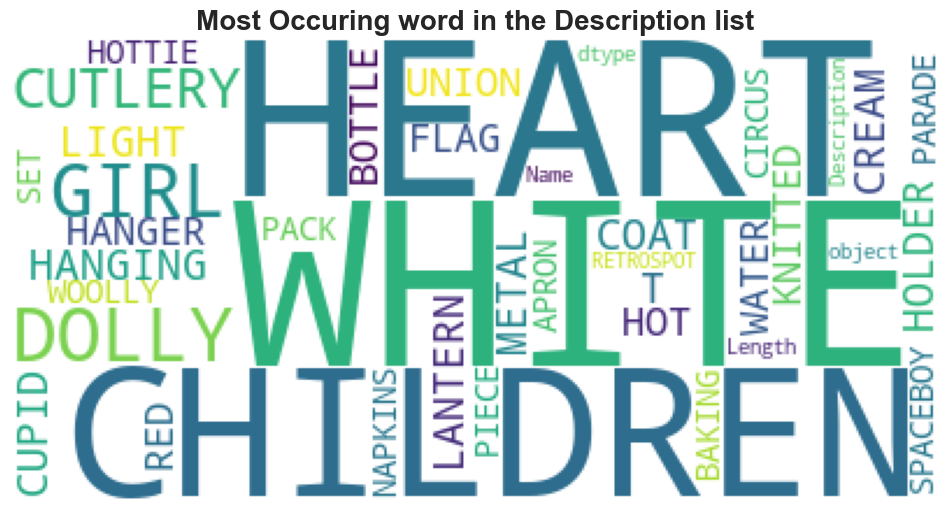

In [63]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(retail['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20, weight='bold')
plt.savefig("Most Occuring word in the Description list")
plt.show()

### Which Item is sold more often

In [64]:
retail.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [65]:
sold_item = pd.DataFrame(retail.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10))

In [66]:
sold_item.head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


In [67]:
sold_item.tail()

,Quantity
Description,
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202
MINI PAINT SET VINTAGE,26076


In [68]:
sold_item.reset_index(inplace=True)
sold_item.head()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,JUMBO BAG RED RETROSPOT,46181
4,WHITE HANGING HEART T-LIGHT HOLDER,36725


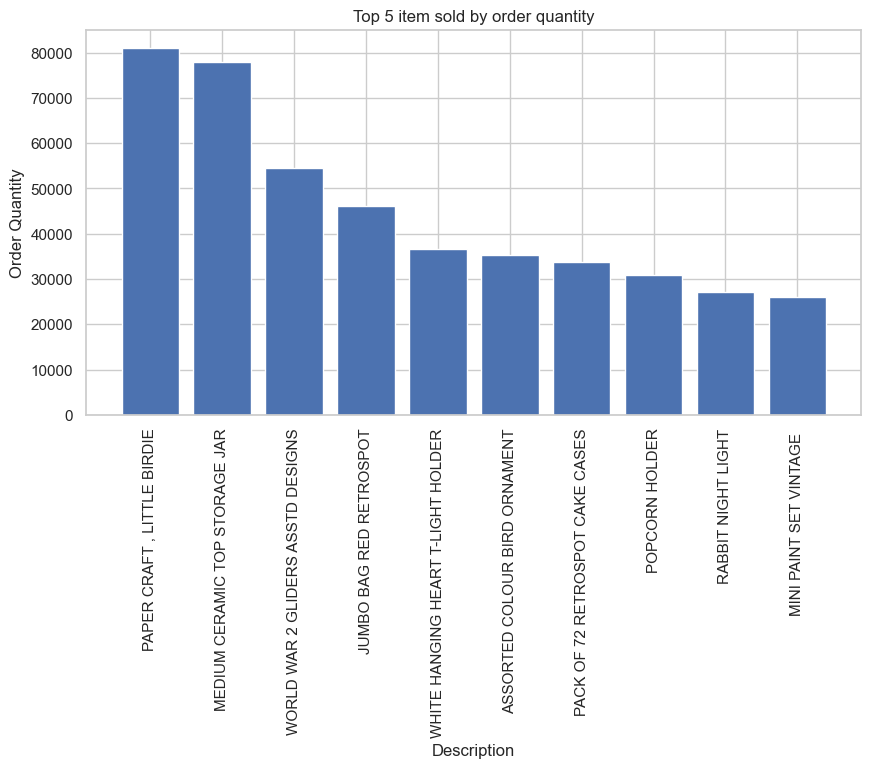

In [69]:
fig = plt.figure(figsize = (10, 5))
x=sold_item.Description	
y=sold_item["Quantity"]
plt.bar(x, y)
plt.xlabel("Description")
plt.ylabel("Order Quantity")
plt.title("Top 5 item sold by order quantity")
plt.xticks(rotation=90)
plt.savefig("Top 5 item sold by order quantity")
plt.show()

In [ ]:
fig = plt.figure(figsize = (10, 5))
x=sold_item.Description	
y=sold_item["Quantity"]
plt.bar(x, y)
plt.xlabel("Description")
plt.ylabel("Order Quantity")
plt.title("Bottom 5 item sold by order quantity")
plt.xticks(rotation=90)
plt.savefig("Bottom 5 item sold by order quantity")
plt.show()

**Here we completed our basic EDA where we did some univariate and bivariate analysis. We also tried answer various question mentioned above on the basis of our prepared and cleaned data.**

In [70]:
# importing libraries.
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.cluster import KMeans

In [71]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
## Let's preprocess the data by  first encode the Country feature!
le = LabelEncoder()
retail['Country'] = le.fit_transform(retail['Country'])

In [73]:
# creating a grouped dataset by CustomerID
custom_aggregation = {}

custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["Revenue"] = "sum"

prepro_data_final = retail.groupby("CustomerID").agg(custom_aggregation)
prepro_data_final.columns = ["frequency", "monetary_value"]
prepro_data_final.head(10)

,frequency,monetary_value
CustomerID,,
12346,1,77183.60
12347,182,4310.00
12348,31,1797.24
12349,73,1757.55
12350,17,334.40
12352,85,2506.04
12353,4,89.00
12354,58,1079.40
12355,13,459.40


In [74]:
prepro_data_final.reset_index(inplace=True)
prepro_data_final.head(10)

,CustomerID,frequency,monetary_value
0,12346,1,77183.60
1,12347,182,4310.00
2,12348,31,1797.24
3,12349,73,1757.55
4,12350,17,334.40
5,12352,85,2506.04
6,12353,4,89.00
7,12354,58,1079.40
8,12355,13,459.40
9,12356,59,2811.43


In [75]:
# mergeing the grouped data with full data
retail = pd.merge(retail,prepro_data_final, on='CustomerID')

In [76]:
retail = retail[['InvoiceNo', 'StockCode', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue',
             'frequency', 'monetary_value']].set_index('CustomerID')
retail.head(10)

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Revenue,frequency,monetary_value
CustomerID,,,,,,,,
17850,536365,85123A,6,2.55,35,15.30,297,5391.21
17850,536365,71053,6,3.39,35,20.34,297,5391.21
17850,536365,84406B,8,2.75,35,22.00,297,5391.21
17850,536365,84029G,6,3.39,35,20.34,297,5391.21
17850,536365,84029E,6,3.39,35,20.34,297,5391.21
17850,536365,22752,2,7.65,35,15.30,297,5391.21
17850,536365,21730,6,4.25,35,25.50,297,5391.21
17850,536366,22633,6,1.85,35,11.10,297,5391.21
17850,536366,22632,6,1.85,35,11.10,297,5391.21


In [77]:
custom_aggregation = {}
custom_aggregation["Revenue"] = ['min','max','mean']
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

retail_final = retail.groupby("CustomerID").agg(custom_aggregation)
retail_final.columns = ["min", "max", "mean", "frequency", "monetary_value", "quantity", "country"]
retail_final.head(10)

,min,max,mean,frequency,monetary_value,quantity,country
CustomerID,,,,,,,
12346,77183.60,77183.60,77183.60,1,77183.60,74215,35
12347,5.04,249.60,23.68,182,4310.00,2458,16
12348,13.20,240.00,57.98,31,1797.24,2341,12
12349,6.64,300.00,24.08,73,1757.55,631,18
12350,8.50,40.00,19.67,17,334.40,197,24
12352,9.90,376.50,29.48,85,2506.04,536,24
12353,11.60,39.80,22.25,4,89.00,20,2
12354,8.50,54.08,18.61,58,1079.40,530,30
12355,17.70,120.00,35.34,13,459.40,240,2


### Let's check if there're any extreme outliers in the new data!

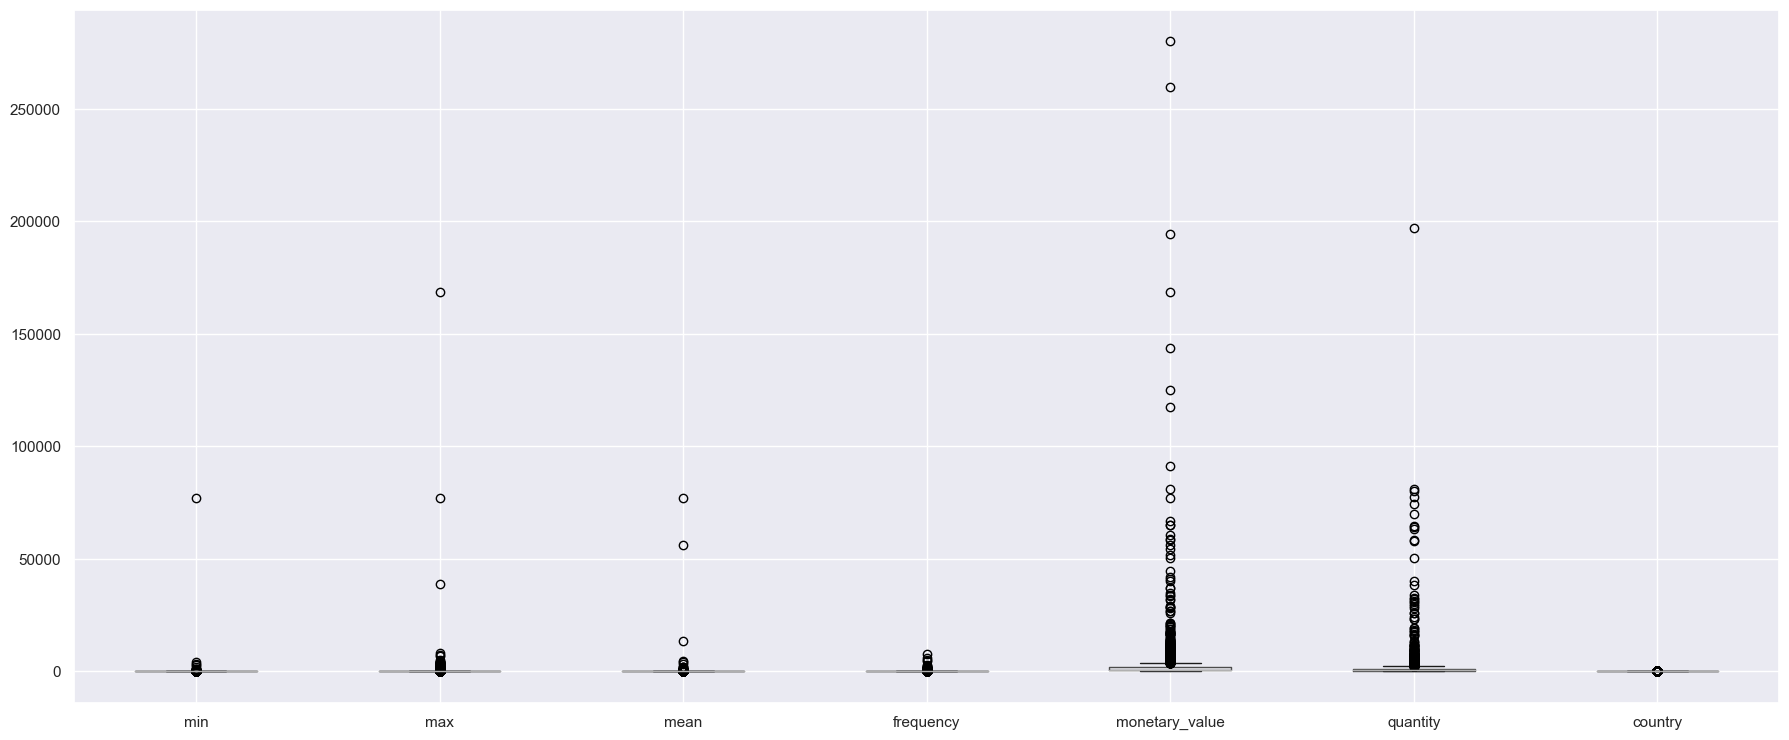

In [78]:
retail_final.boxplot(figsize=(22,9));

### Removing the extreme outliers from monetary_value and quantity:

In [79]:
# creating a function that removes outliers statisticaly. 
def remove_outliers(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    column = column[((Q1 - 1.5 * IQR) <= column) & (column  <= (Q3 + 1.5 * IQR))]
    return column

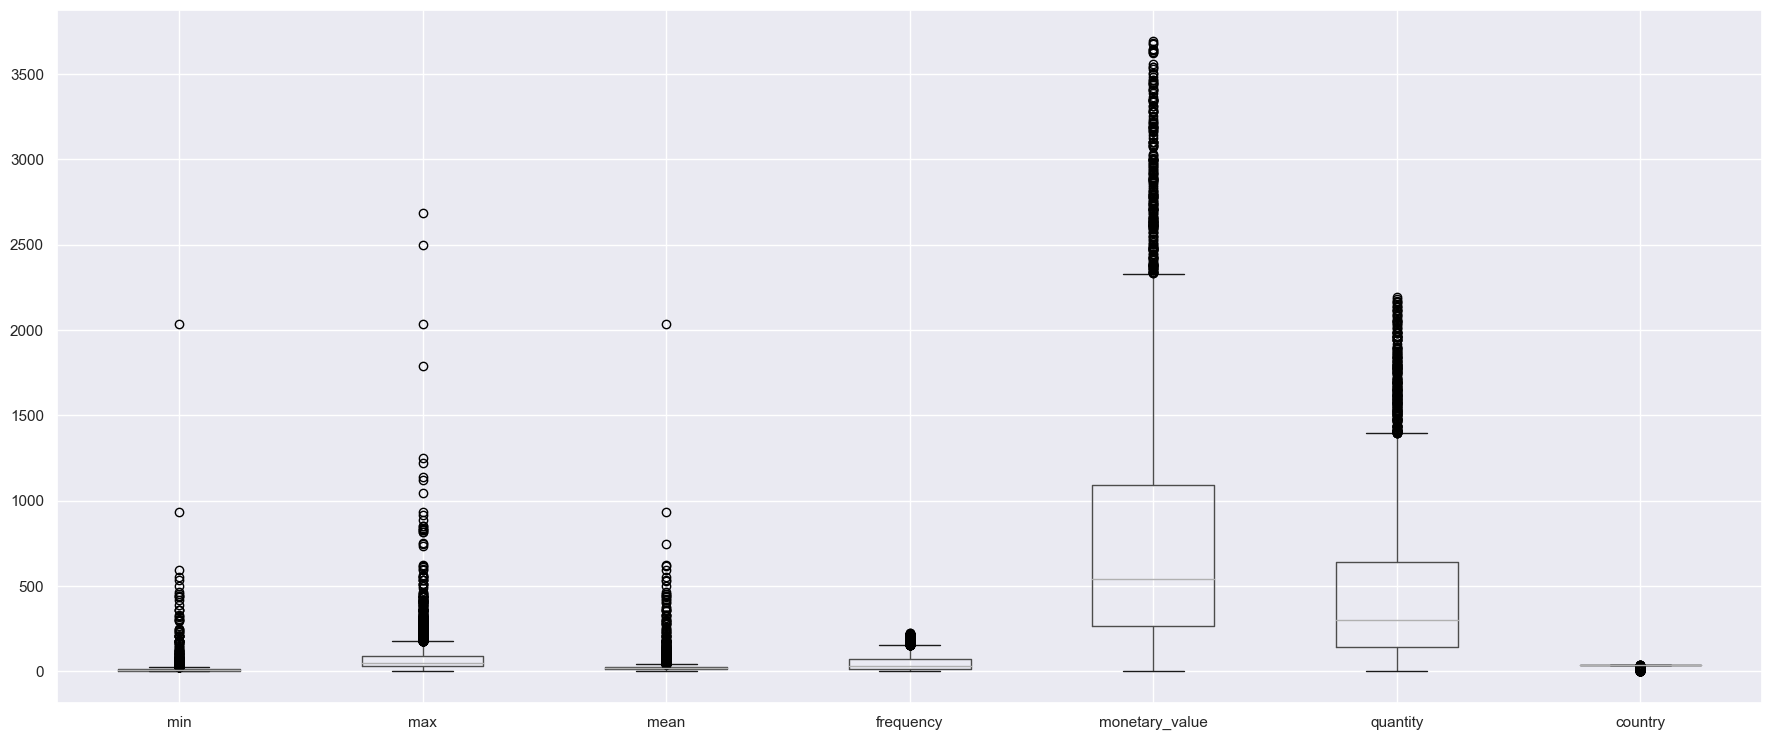

In [80]:
retail_final['monetary_value'] = remove_outliers(retail_final['monetary_value'])
retail_final['quantity'] = remove_outliers(retail_final['quantity'])
retail_final['frequency'] = remove_outliers(retail_final['frequency'])
retail_final.dropna(inplace=True)
retail_final.boxplot(figsize=(22,9));

### Elbow plot:

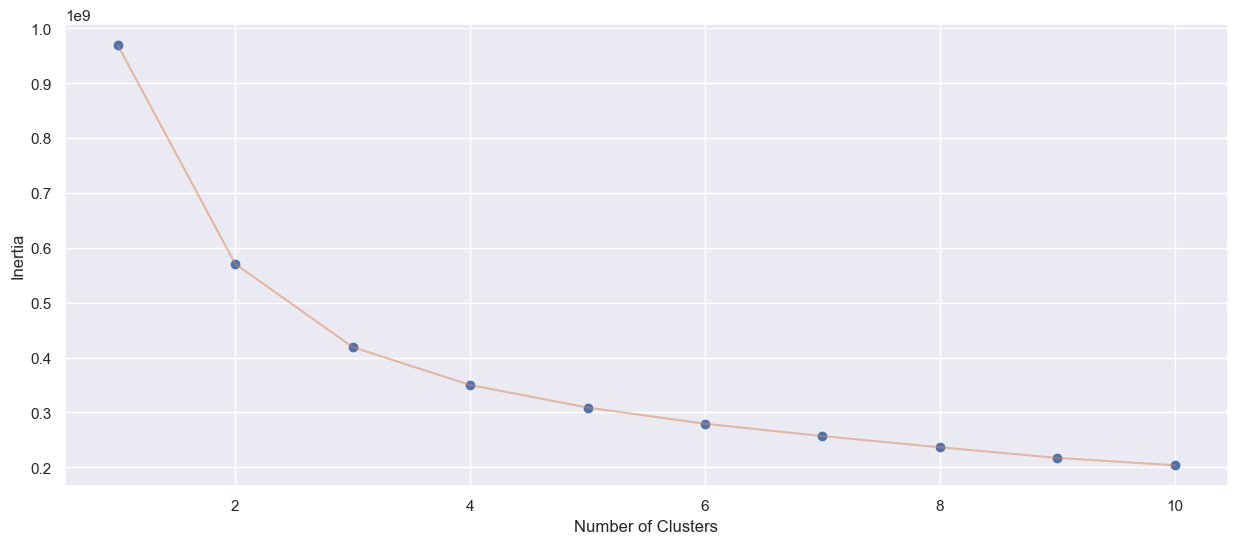

In [81]:
inertia = []

x = list(range(2, 12))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(retail_final)
    inertia.append(kmeans.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [82]:
kmeans = KMeans(init='k-means++', n_clusters = 3, n_init=30, random_state=0) 
retail_final['clusters'] = kmeans.fit_predict(retail_final)
retail_final.clusters.value_counts()

clusters
0    2316
1     963
2     428
Name: count, dtype: int64

### Cluster 1:

In [83]:
c1 = pd.merge(retail,retail_final.reset_index()[['clusters','CustomerID']], on='CustomerID')
c1 = c1[c1.clusters == 0]
c1.describe()

,CustomerID,Quantity,UnitPrice,Country,Revenue,frequency,monetary_value,clusters
count,66629.00,66629.00,66629.00,66629.00,66629.00,66629.00,66629.00,66629.00
mean,15558.88,6.94,3.07,33.88,12.16,58.40,442.86,0.00
std,1676.41,12.38,5.80,4.91,18.45,45.04,191.98,0.00
min,12350.00,1.00,0.00,0.00,0.00,1.00,3.75,0.00
25%,14114.00,1.00,1.25,35.00,2.95,25.00,291.41,0.00
50%,15677.00,3.00,1.95,35.00,8.32,42.00,429.84,0.00
75%,16971.00,10.00,3.75,35.00,15.90,85.00,606.13,0.00
max,18282.00,600.00,464.90,36.00,734.40,218.00,920.10,0.00


### Customers in cluster 1 have:
- Average Order Quantity of 6.94.
- Average Unit price of 3.07.
- Average Revenue of 12.16.
- Average Frequency of 58.
- Average Monetary value of 442.86.

### Cluster 2:

In [84]:
c2 = pd.merge(retail,retail_final.reset_index()[['clusters','CustomerID']], on='CustomerID')
c2 = c2[c2.clusters == 1]
c2.describe()

,CustomerID,Quantity,UnitPrice,Country,Revenue,frequency,monetary_value,clusters
count,67533.00,67533.00,67533.00,67533.00,67533.00,67533.00,67533.00,67533.00
mean,15300.02,10.04,3.06,33.56,16.59,98.42,1198.09,1.00
std,1625.96,21.73,9.54,5.51,25.85,52.08,319.35,0.00
min,12349.00,1.00,0.00,0.00,0.00,1.00,244.80,1.00
25%,13890.00,2.00,1.25,35.00,5.90,57.00,932.85,1.00
50%,15380.00,6.00,1.95,35.00,13.20,85.00,1149.02,1.00
75%,16657.00,12.00,3.75,35.00,18.60,134.00,1448.21,1.00
max,18263.00,1728.00,2033.10,36.00,2033.10,219.00,2033.10,1.00


### Customers in cluster 2 have:

- Average Order Quantity of 10.4.
- Average Unit price of 3.06.
- Average Revenue of 16.59.
- Average Frequency of 98.42.
- Average Monetary value of 1198.09.

### Cluster 3:

In [85]:
c3 = pd.merge(retail,retail_final.reset_index()[['clusters','CustomerID']], on='CustomerID')
c3 = c3[c3.clusters == 2]
c3.describe()

,CustomerID,Quantity,UnitPrice,Country,Revenue,frequency,monetary_value,clusters
count,48443.00,48443.00,48443.00,48443.00,48443.00,48443.00,48443.00,48443.00
mean,15116.52,12.29,3.27,32.37,21.77,132.73,2524.31,2.00
std,1779.05,19.59,14.13,7.63,34.13,42.69,528.64,0.00
min,12352.00,1.00,0.00,0.00,0.00,3.00,1445.01,2.00
25%,13632.00,4.00,1.25,35.00,10.50,105.00,2095.53,2.00
50%,14844.00,10.00,1.95,35.00,16.50,129.00,2445.91,2.00
75%,16743.00,12.00,3.75,35.00,20.80,162.00,2915.15,2.00
max,18287.00,1500.00,2500.00,35.00,2685.00,223.00,3692.28,2.00


### Customers in cluster 3 have:

- Average Order Quantity of 12.29.
- Average Unit price of 3.27.
- Average Revenue of 21.77.
- Average Frequency of 132.73.
- Average Monetary value of 2524.31.

# Insights

- We notice that this retail based online store is all over the world but mostly have influence in Europe, especially in UK.
- UK also exceeds and have almost more than 80% of share in total orders, order quantity, revenue share.
- Among top countries Germany, France have higher # of orders but Ned and EIRE have higher in total order, order quantity and revenue share.
- Surprisingly Among top 3 customers by revenue contribution, top customer was (CustID – 14646) was from Netherlands and not UK.
- Most occurring word in Description column was “CHILDREN”, “HEART” and “WHITE”
- We also analyzed least sold items.  
- Cluster-3 is having higher revenue, monetary value, frequency and order quantity followed by cluster 2 & 3 , but unit price remains the same for all the clusters.

# Conclusion

- We can segment customers on this basis design different marketing programs to motivate their buying
- We can provide high paying customers some extra benefits like prime members, Free Delivery etc.
- As business is already established well in European county, they can focus to expand their business in countries which are at bottom in order quantity and total rev contribution.
- Top customers can be rewarded and motivated for continuous buying & can be provided by special recognition
- SEO and SEM digital marketing strategy can be used for increasing sales.